In [2]:
import numpy as np
np.random.seed(20221110)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import scipy.stats as stats


## Correlations 

Example: Let's plot the crime rate vs. change of population in neighborhoods

x- % of population change
y- crimes commited

x|29| 2|11|17| 7| 6|
-|-|-|-|-|-|-|
y|173|35|132|127|69|53|

Let's plot the data.

Usually we call x the $\bf{explanatory}$ variable, and y the $\bf{response}$ variable.

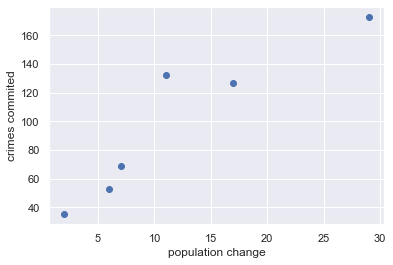

In [2]:
x=np.array([29,2,11,17,7,6])
y=np.array([173,35,132,127,69,53])

plt.scatter(x,y)
plt.xlabel('population change')
plt.ylabel('crimes commited')
plt.show()

#### The aim is to create a theoretical model, relation between the variables

Simplest model is a linear relation. We can create it using a linear regression. 

We will get to that later, for now note that there is clearly some relation between the variables.

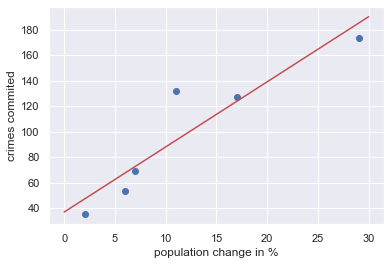

In [3]:
A = np.vstack([x, np.ones(len(x))]).T
m, c = np.linalg.lstsq(A, y, rcond=None)[0]

x1=np.linspace(0,30,100)
y1=m*x1+c

plt.scatter(x,y,label='Measured data')
plt.plot(x1,y1,label='Model',color='r')
plt.xlabel('population change in %')
plt.ylabel('crimes commited')
plt.show()

#### Correlation as a measure of linear relashionship

Important not to consider it a causal relationship. 

Larger population may cause more crime cases, but the crime rate is the same.

##### Pearson correlation coefficient r (or sometimes R)

Measure of correlations in a sample.

$r=\frac{\sum_{i=1}^n(x_i-\bar{x})(y_i-\bar{y})}{\sqrt{\sum_{i=1}^n(x_i-\bar{x})^2}\sqrt{\sum_{i=1}^n(y_i-\bar{y})^2}}$

The Pearson correlation coefficient is: 0.9267122317693947
The points are highly correlated.
The correlation matrix is:
[[1.         0.92671223]
 [0.92671223 1.        ]]


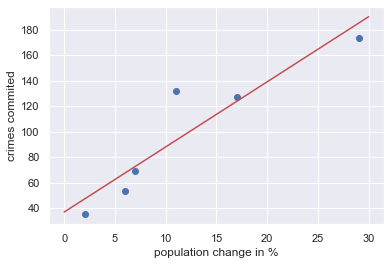

In [4]:
#NumPy has a method corrcoef, but it returns a matrix, realted to the covariance matrix
#We will get to that later. For now, r is the offdiagonal element

r=np.corrcoef(x,y)
print("The Pearson correlation coefficient is:",r[0,1])
print("The points are highly correlated.")
print("The correlation matrix is:")
print(r)

plt.scatter(x,y,label='Measured data')
plt.plot(x1,y1,label='Model',color='r')
plt.xlabel('population change in %')
plt.ylabel('crimes commited')
plt.show()

The Pearson correlation coefficient is: 1.0
The points are highly correlated.
The correlation matrix is:
[[1. 1.]
 [1. 1.]]


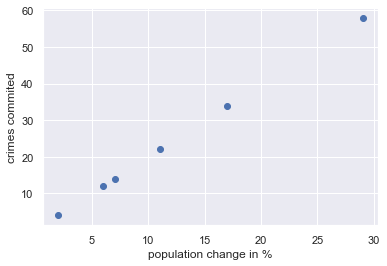

In [5]:
#If the points are perfectly correlated, r=1

y_perfect=2*x
r=np.corrcoef(x,y_perfect)
print("The Pearson correlation coefficient is:",r[0,1])
print("The points are highly correlated.")
print("The correlation matrix is:")
print(r)

plt.scatter(x,y_perfect)
plt.xlabel('population change in %')
plt.ylabel('crimes commited')
plt.show()

The Pearson correlation coefficient is: -1.0
The points are highly anti-correlated.
The correlation matrix is:
[[ 1. -1.]
 [-1.  1.]]


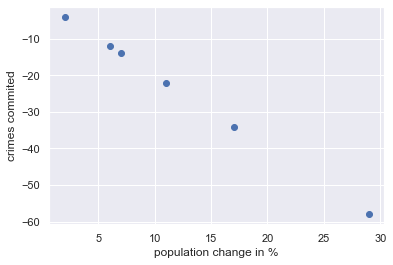

In [6]:
#If they are anti-correlated, r=-1

#If the points are perfectly correlated, r=1

y_anti=-2*x
r=np.corrcoef(x,y_anti)
print("The Pearson correlation coefficient is:",r[0,1])
print("The points are highly anti-correlated.")
print("The correlation matrix is:")
print(r)

plt.scatter(x,y_anti)
plt.xlabel('population change in %')
plt.ylabel('crimes commited')
plt.show()

The Pearson correlation coefficient is: 0.3606210494668232
The points are not correlated.
The correlation matrix is:
[[1.         0.36062105]
 [0.36062105 1.        ]]


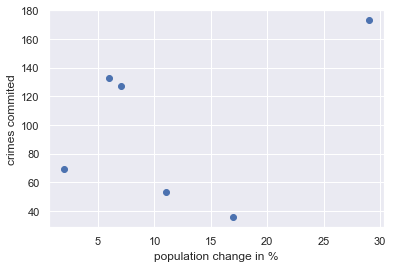

In [7]:
#If they are not correlated, there is no linear relationship, r=0

#If the points are perfectly correlated, r=1

y_nc=y+np.random.uniform()
np.random.shuffle(y_nc)

r=np.corrcoef(x,y_nc)
print("The Pearson correlation coefficient is:",r[0,1])
print("The points are not correlated.")
print("The correlation matrix is:")
print(r)

plt.scatter(x,y_nc)
plt.xlabel('population change in %')
plt.ylabel('crimes commited')
plt.show()

#### For population correlation, usual notation is $\rho$

Correlation is not the same as causation.

Example: Church attendance and crimes are correlated, due to population size, not in causal relationship.

#### Rank correlations for nonlinear, but monotonic relations

Monotonic: if x grows, so does y. If x falls, so does y.

### Spearman rank correlation coefficient

Measure of nonlinear correlations.

Procedure: 
    
    1. Rank all $x_i$ and rank all $y_i$.
    2. Then calculate the differences in the ranks $d_i=R(x_i)-R(y_i)$.
    3. Spearman rank correlation is:
    
$r_s=1-\frac{6\sum_{i=1}^nd_i^2}{n(n^2-1)}$


The Pearson correlation coefficient is: 0.7552166785556949
The points are not linearly correlated.
The Spearman correlation coefficient is: 0.8451127819548873
The points are rank correlated.


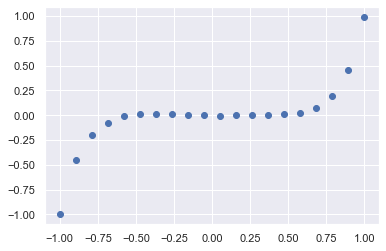

In [8]:
x=np.linspace(-1,1,20)
y=x**7+np.random.normal(scale=0.01,size=20)

plt.scatter(x,y)
r=np.corrcoef(x,y)
rs=stats.spearmanr(x,y)
print("The Pearson correlation coefficient is:",r[0,1])
print("The points are not linearly correlated.")
print("The Spearman correlation coefficient is:",rs[0])
print("The points are rank correlated.")


## (Linear) Regression

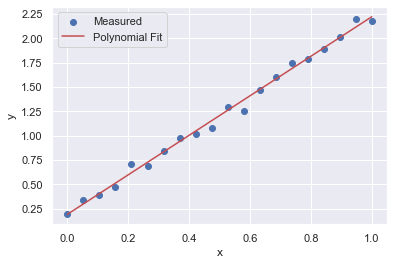

In [9]:
x=np.linspace(0,1,20)
y=2*x+0.2+np.random.normal(scale=0.05,size=20)

plt.scatter(x,y,label="Measured")

y_fit=np.polynomial.polynomial.Polynomial.fit(x,y,deg=1)
slope, intercept, r, p, se=stats.linregress(x,y)

x_fit=np.linspace(0,1,1000)
plt.plot(x_fit,y_fit(x_fit),color='r',label='Polynomial Fit')
#plt.plot(x_fit,slope*x_fit+intercept,color='g',label='Linear Regression')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()



#### How is it done?

First we need a $\bf{cost\ function}$. A function that will be minimized for the best fit. 

Let's plot the best fit, and a horrible one.


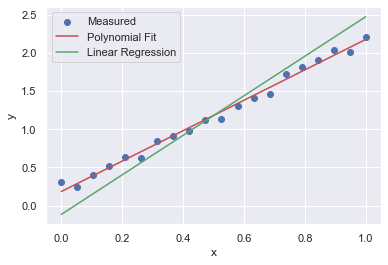

In [10]:
x=np.linspace(0,1,20)
y=2*x+0.2+np.random.normal(scale=0.05,size=20)

plt.scatter(x,y,label="Measured")

y_fit=np.polynomial.polynomial.Polynomial.fit(x,y,deg=1)
slope, intercept, r, p, se=stats.linregress(x,y)

x_fit=np.linspace(0,1,1000)
plt.plot(x_fit,y_fit(x_fit),color='r',label='Polynomial Fit')
plt.plot(x_fit,1.3*slope*x_fit-0.3+intercept,color='g',label='Linear Regression')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

The cost function is the $\bf{Mean\ Square\ Errors}$ or $MSE$:

$MSE=\frac{1}{n}\sum_{i=1}^n(y_i-y_{fit}(x_i))^2$

We can illustrate this by plotting vertical lines from $y_i$ to $y_{fit}(x_i)$.

First let's do it for the horrible fit.

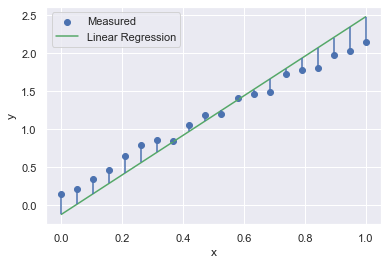

In [11]:
x=np.linspace(0,1,20)
y=2*x+0.2+np.random.normal(scale=0.05,size=20)

plt.scatter(x,y,label="Measured")

slope, intercept, r, p, se=stats.linregress(x,y)

x_fit=np.linspace(0,1,1000)
#plt.plot(x_fit,y_fit(x_fit),color='r',label='Polynomial Fit')
plt.plot(x_fit,1.3*slope*x_fit-0.3+intercept,color='g',label='Linear Regression')
plt.vlines(x, np.minimum(y,1.3*slope*x-0.3+intercept), np.maximum(y,1.3*slope*x-0.3+intercept), colors='b')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

Now let's visualize the errors for the best fit.

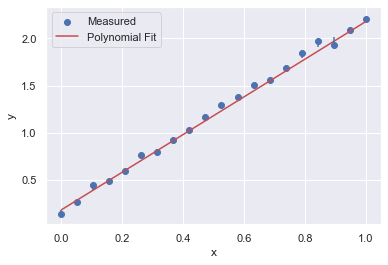

In [12]:

x=np.linspace(0,1,20)
y=2*x+0.2+np.random.normal(scale=0.05,size=20)

plt.scatter(x,y,label="Measured")

slope, intercept, r, p, se=stats.linregress(x,y)

x_fit=np.linspace(0,1,1000)
plt.plot(x_fit,y_fit(x_fit),color='r',label='Polynomial Fit')
#plt.plot(x_fit,1.3*slope*x_fit-0.3+intercept,color='g',label='Linear Regression')
plt.vlines(x, np.minimum(y,slope*x+intercept), np.maximum(y,slope*x+intercept), colors='b')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

We see that the sum of the blue vertical lines, the errors, is much smaller for the best fit.

##### Let's see how do we find the best fit.

### Least squares procedure.

We simply minimize the Mean Square error for the fit, for the line.

Start with MSE:

$MSE=\frac{1}{n}\sum_{i=1}^n(y_i-y_{fit}(x_i))^2$

Note that the fit function is:

$y_{fit}=ax+b$

where $a$ is the slope and $b$ is the intercept of the fit.

In other words, for each $x_i$ we have $y_{fit}(x_i)=ax_i+b$

so we have:

$MSE=\frac{1}{n}\sum_{i=1}^n(y_i-ax_i-b)^2$

The goal is to find $a$ and $b$, such that $MSE$ is as small as possible. 

This means $MSE$ is a function of $a$ and $b$:

$MSE=MSE(a,b)$

and we are looking for $a_m$ and $b_m$ such that:

$min(MSE)=MSE(a_m,b_m)$

$S$ is often used as a symbol for $MSE$. 

Let's plot an example:

Text(0, 0.5, 'S')

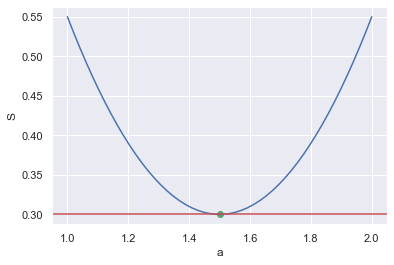

In [13]:
# Let's plot an example of MSE as a function of a, the slope
x=np.linspace(1,2)
y=(x-1.5)**2+0.3

plt.plot(x,y)
plt.axhline(0.3,color='r')
plt.scatter(1.5,0.3,color='g')
plt.xlabel('a')
plt.ylabel('S')

The tangent of this curve at the minimum is flat.

The slope of the S curve at the minimum is zero. 

Do you remember how do we find the slope of a tangent of a curve?


##### Derive S over a, and take the point with zero derivative.

In othe words, at the minimum:
    
$\frac{dS}{da}=0$

So ging bact to the formula for $S$:

$MSE=\frac{1}{n}\sum_{i=1}^n(y_i-ax_i-b)^2$

we have:

$\frac{dS}{da}=\frac{1}{n}\sum_{i=1}^n2(y_i-ax_i-b)(-x_i)$

or:

$\frac{dS}{da}=\frac{2}{n}\sum_{i=1}^n(-x_iy_i+ax_{i}^2+bx_i)$



$\frac{dS}{da}=\frac{2}{n}(\sum_{i=1}^n-x_iy_i+a\sum_{i=1}^nx_{i}^2+b\sum_{i=1}^nx_i)$

to find $a_m$ and $b_m$ we have:

$\sum_{i=1}^n-x_iy_i+a_m\sum_{i=1}^nx_{i}^2+b_m\sum_{i=1}^nx_i=0$


If we do the same for $b$, we have:

$\sum_{i=1}^ny_i-a_m\sum_{i=1}^nx_{i}-nb_m=0$

This is a system of two linear equations.

Replacing $b_m=\frac{1}{n}(\sum_{i=1}^ny_i-a_m\sum_{i=1}^nx_{i})$

in the above equation, we get:

$n\sum_{i=1}^n-x_iy_i+na_m\sum_{i=1}^nx_{i}^2+\sum_{i=1}^nx_i\sum_{i=1}^ny_i-a_m\sum_{i=1}^nx_i\sum_{i=1}^nx_{i}=0$

$a_m(n\sum_{i=1}^nx_{i}^2-\sum_{i=1}^nx_i\sum_{i=1}^nx_{i})=n\sum_{i=1}^nx_iy_i-\sum_{i=1}^nx_i\sum_{i=1}^ny_i$

So to find the slope $a$ and intercept $b$ we use:

$a=\frac{n\sum_{i=1}^nx_iy_i-\sum_{i=1}^nx_i\sum_{i=1}^ny_i}{n\sum_{i=1}^nx_{i}^2-(\sum_{i=1}^nx_i)^2}$

$b=\frac{1}{n}(\sum_{i=1}^ny_i-a\sum_{i=1}^nx_{i})$





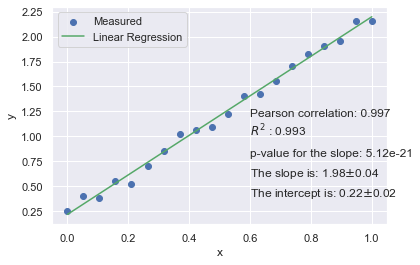

In [41]:
#We use stats.linregress
x=np.linspace(0,1,20)

y=2*x+0.2+np.random.normal(scale=0.05,size=20)

plt.scatter(x,y,label="Measured")

res = stats.linregress(x,y)

x_fit=np.linspace(0,1,1000)

plt.plot(x_fit,res.slope*x_fit+res.intercept,color='g',label='Linear Regression')

#plt.vlines(x, np.minimum(y,slope*x+intercept), np.maximum(y,slope*x+intercept), colors='b')
plt.xlabel('x')
plt.ylabel('y')
plt.text(0.6,1.2,"Pearson correlation: "+str(round(res.rvalue,3)))
plt.text(0.6,1.0,r"$R^2$ : "+str(round(res.rvalue**2,3)))
plt.text(0.6,0.8,"p-value for the slope: "+str(np.format_float_scientific(res.pvalue,precision=2)))
plt.text(0.6,0.6,"The slope is: "+str(round(res.slope,2))+r"$\pm$"+str(round(res.stderr,2)))
plt.text(0.6,0.4,"The intercept is: "+str(round(res.intercept,2))+r"$\pm$"+str(round(res.intercept_stderr,2)))

plt.legend()
plt.show()

Here $R^2$ is the $\bf{coefficient\ of\ determination}$ or $\bf{goodness of the fit}$. 

(Only) In the case of linear regression $R^2=r^2$, the goodness of fit is the same as the square of the Pearson correlation coefficiant. 

In general, it is not a square of anything, just a notation for:

$R^2=1-\frac{\sum_{i=1}^n(y_i-y_{fit}(x_i))^2}{\sum_{i=1}^n(y_i-\bar{y})^2}$

The closer to 1, the better the fit. 


p-value for the slope to be other than 0, calculated by the t-test. (there are options for greater or less than zero)

The standard error for the slope is:

$s(a)=\sqrt{\frac{1}{n-2}\frac{\sum_{i=1}^n(y_i-y_{fit}(x_i))^2}{\sum_{i=1}^n(x_i-\bar{x})^2}}$

The standard error of the intercept:

$s(a)=\sqrt{\frac{1}{n(n-2)}\frac{\sum_{i=1}^n(y_i-y_{fit}(x_i))^2\sum_{i=1}^nx_i^2}{\sum_{i=1}^n(x_i-\bar{x})^2}}$

#### Non-linear regressions

Example: Logistic curve

$y(x)=\frac{1}{1+e^{-x}}$

A smoothed "step" function. Found very ofthen in biology.

A function of population growth in ecology. (We will cover that in a separate class).

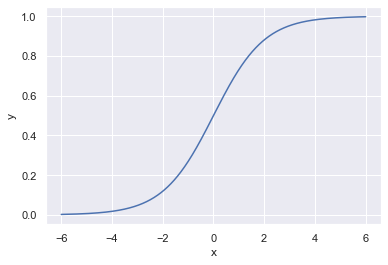

In [3]:
x=np.linspace(-6,6,1000)
y=1/(1+np.exp(-x))

plt.plot(x,y)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In general:

$y=\frac{L}{1+e^{-k(x-x_0)}}$

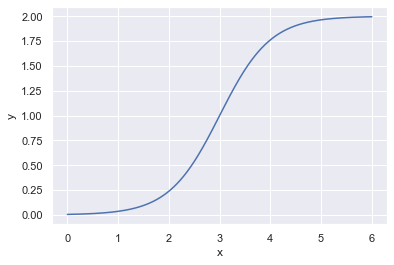

In [38]:
#Example
L=2.0
k=2.0
x_0=3.0

x=np.linspace(0,6,1000)
y=L/(1+np.exp(-k*(x-x_0)))

plt.plot(x,y)
plt.xlabel('x')
plt.ylabel('y')

plt.show()

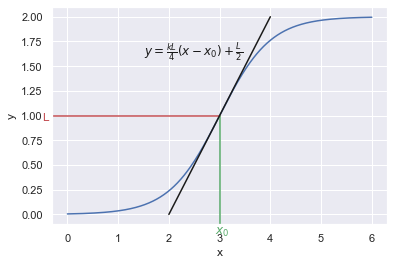

In [37]:
#Example
L=2.0
k=2.0
x_0=3.0

x=np.linspace(0,6,1000)
y=L/(1+np.exp(-k*(x-x_0)))

plt.plot(x,y)
plt.xlabel('x')
plt.ylabel('y')
plt.axhline(1.0,0.0,0.5,color='r')
plt.text(-0.5,0.95,'L',color='r')
plt.axvline(3.0,0.0,0.5,color='g')
plt.text(2.9,-0.2,r'$x_0$',color='g')

x_lin=np.linspace(2.0,4.0,1000)
y_lin=k*L*(x_lin-x_0)/4+L/2
plt.plot(x_lin,y_lin,color='k')
plt.text(1.5,1.6,r"$y=\frac{kL}{4}(x-x_0)+\frac{L}{2}$",color='k')
plt.show()

##### Derivative of the logistic function

Recall the derivative of a composite function:

If $y=f(g(x))$:

$y^\prime=f^\prime(g) g^\prime(x)$

Derivative of a ratio:

$y=\frac{f(x)}{g(x)}$

$y^\prime=\frac{f^\prime(x)g(x)-f(x)g^\prime(x)}{g^2(x)}$

so:

if $y=\frac{1}{f(x)}$

$y^\prime=-\frac{f^\prime(x)}{f^2(x)}$

So for:

$y=\frac{L}{1+e^{-k(x-x_0)}}$

so:

$y^\prime=-L\frac{(1+e^{-k(x-x_0)})^\prime}{(1+e^{-k(x-x_0)})^2}$


$y^\prime=-L\frac{-ke^{-k(x-x_0)}}{(1+e^{-k(x-x_0)})^2}$

$y^\prime=L\frac{ke^{-k(x-x_0)}}{(1+e^{-k(x-x_0)})^2}$

But:

if $y=\frac{1}{1+e^{-k(x-x_0)}}$

$\frac{1}{1+e^{-k(x-x_0)}}(1-\frac{1}{1+e^{-k(x-x_0)}})=\frac{e^{-k(x-x_0)}+1-1}{(1+e^{-k(x-x_0)})^2}=y(1-y)$

So for the logistic function, the derivative is simple to calculate:

if $y=\frac{L}{1+e^{-k(x-x_0)}}$

then:

$y^\prime=kLy(1-y)$

##### least squares for logistic function

$y_{fit}=\frac{1}{1+e^{-kx}}$

$MSE=\frac{1}{n}\sum_{i=1}^n(y_i-y_{fit}(x_i;k))^2$

$\frac{dMSE}{dk}=\frac{1}{n}\sum_{i=1}^n2(y_i-y_{fit}(x_i))x_iy_{fit}(x_i)(1-y_{fit}(x_i))$

and so on...

We will use the function in scikit.sklearn, that's nest class.


#### Losgistic function is a good approxibation of a decision (Heavyside) function.

###### Also a switch, on/off function.

In the extreme of $k\to\infty$ the function becomeas a step-function.

$H(x)=
    \begin{cases}
      0 & \text{if } x\leq 0\\
      1 & \text{if } x > 0
    \end{cases}   
$

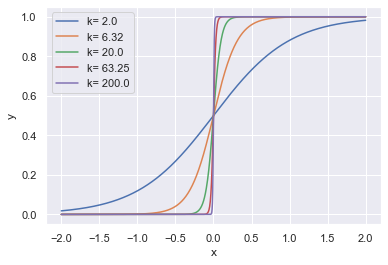

In [71]:
#Example

k=2.0

x=np.linspace(-2,2,1000)
for i in np.logspace(0,2,5):
    y=1/(1+np.exp(-i*k*x))
    plt.plot(x,y,label="k= "+str(round(i*k,2)))
    
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()